<a href="https://colab.research.google.com/github/dxmai/CS114.L21.KHCL/blob/main/Colab/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tham khảo tại nguồn:

https://www.askpython.com/python/examples/linear-regression-in-python

https://datatofish.com/create-pandas-dataframe/

Xử lý training dataset

In [385]:
import pandas as pd

dataset = pd.read_csv("https://cs.uit.edu.vn/data2.txt", names = ['size', 'time'])

print(dataset)


          size      time
0      6083695  0.521842
1      1954367  0.152648
2      3734185  0.298548
3      5839301  0.460480
4      6343427  0.527977
...        ...       ...
71110  4472112  0.350379
71111  5471895  0.429955
71112  9837364  0.801394
71113  9466593  0.776407
71114  4080801  0.314468

[71115 rows x 2 columns]


In [386]:
#Tổng số lượng bộ train
dataset.count()

size    71115
time    71115
dtype: int64

Biểu diễn bộ train

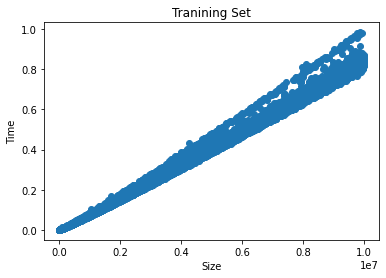

In [387]:
import matplotlib.pyplot as plt

plt.scatter(dataset['size'], dataset['time'])
plt.title("Tranining Set")
plt.xlabel("Size")
plt.ylabel("Time")
plt.show()

In [388]:
#Code của Thầy An
def InCreaseDimensions(x_value):
  x = x_value
  x = np.hstack((x, np.log2(x_value)))
  x = np.hstack((x, x_value*np.log2(x_value)))
  x = np.hstack((x, x_value*x_value))
  return x

Data Preprocessing

In [400]:
import numpy as np

x_train = dataset.iloc[:, :-1].values  
y_train = dataset.iloc[:,1].values 

#print(x_train)

#print(y_train)

x_train_incre = InCreaseDimensions(x_train)

Xử lý testing dataset

In [401]:
test3 = pd.read_csv("https://cs.uit.edu.vn/data3.txt", names = ['test', 'time'])

x_test3 = test3.iloc[:, :-1].values
y_test3 = test3.iloc[:, 1].values

x_test3_incre = InCreaseDimensions(x_test3)

In [402]:
test4 = pd.read_csv("https://cs.uit.edu.vn/data4.txt", names = ['test', 'time'])

x_test4 = test4.iloc[:, :-1].values
y_test4 = test4.iloc[:, 1].values

x_test4_incre = InCreaseDimensions(x_test4)

Mô hình hoá bộ test

[Text(0, 0.5, 'Time'), Text(0.5, 0, 'Size'), Text(0.5, 1.0, 'Testing Set 4')]

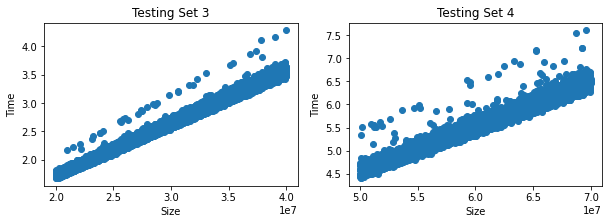

In [403]:
_, (axes1, axes2) = plt.subplots(nrows=1, ncols=2 , figsize=(10, 3))

axes1.scatter(test3['test'], test3['time'])
axes1.set(xlabel = 'Size', ylabel = 'Time', title = 'Testing Set 3')

axes2.scatter(test4['test'], test4['time'])
axes2.set(xlabel = 'Size', ylabel = 'Time', title = "Testing Set 4")


Tạo Model

In [406]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

model_incre = LinearRegression()
model_incre.fit(x_train_incre, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Chạy model

In [408]:
#Bộ dữ liệu data2.txt
y_pred = model.predict(x_train)
y_pred_incre = model_incre.predict(x_train_incre)
#y_pred_train

In [410]:
#Bộ dữ liệu data3.txt
y_pred3 = model.predict(x_test3) 
y_pred3_incre = model_incre.predict(x_test3_incre)
#y_pred3

In [411]:
#Bộ dữ liệu data4.txt
y_pred4 = model.predict(x_test4) 
y_pred4_incre = model_incre.predict(x_test4_incre)
#y_pred4

Tạo bảng so sánh giữa giá trị thực tế và giá trị dự đoán với bộ test

In [413]:
#Bộ dữ liệu data2.txt
result_table = {'Predict': y_pred_train,
                'Real Time': y_train}
result = pd.DataFrame(result_table, columns=['Predict', 'Real Time'])

#Bộ dữ liệu data3.txt
result_table3 = {'Predict': y_pred3,
                'Real Time': y_test3}
result3 = pd.DataFrame(result_table, columns=['Predict', 'Real Time'])

#Bộ dữ liệu data4.txt
result_table4 = {'Predict': y_pred4,
                'Real Time': y_test4}
result4 = pd.DataFrame(result_table, columns=['Predict', 'Real Time'])

print("Training Set\n", result)

print("Testing Set 3\n", result3)

print("Testing Set 4\n", result4)

Training Set
         Predict  Real Time
0      0.498523   0.521842
1      0.149360   0.152648
2      0.299856   0.298548
3      0.477858   0.460480
4      0.520486   0.527977
...         ...        ...
71110  0.362253   0.350379
71111  0.446791   0.429955
71112  0.815922   0.801394
71113  0.784571   0.776407
71114  0.329165   0.314468

[71115 rows x 2 columns]
Testing Set 3
         Predict  Real Time
0      0.498523   0.521842
1      0.149360   0.152648
2      0.299856   0.298548
3      0.477858   0.460480
4      0.520486   0.527977
...         ...        ...
71110  0.362253   0.350379
71111  0.446791   0.429955
71112  0.815922   0.801394
71113  0.784571   0.776407
71114  0.329165   0.314468

[71115 rows x 2 columns]
Testing Set 4
         Predict  Real Time
0      0.498523   0.521842
1      0.149360   0.152648
2      0.299856   0.298548
3      0.477858   0.460480
4      0.520486   0.527977
...         ...        ...
71110  0.362253   0.350379
71111  0.446791   0.429955
71112  0.8159

Mô hình hoá kết quả khi KHÔNG increase dimension

[Text(0, 0.5, 'Time'),
 Text(0.5, 0, 'Size'),
 Text(0.5, 1.0, 'data4.txt: Trained by data2.txt ')]

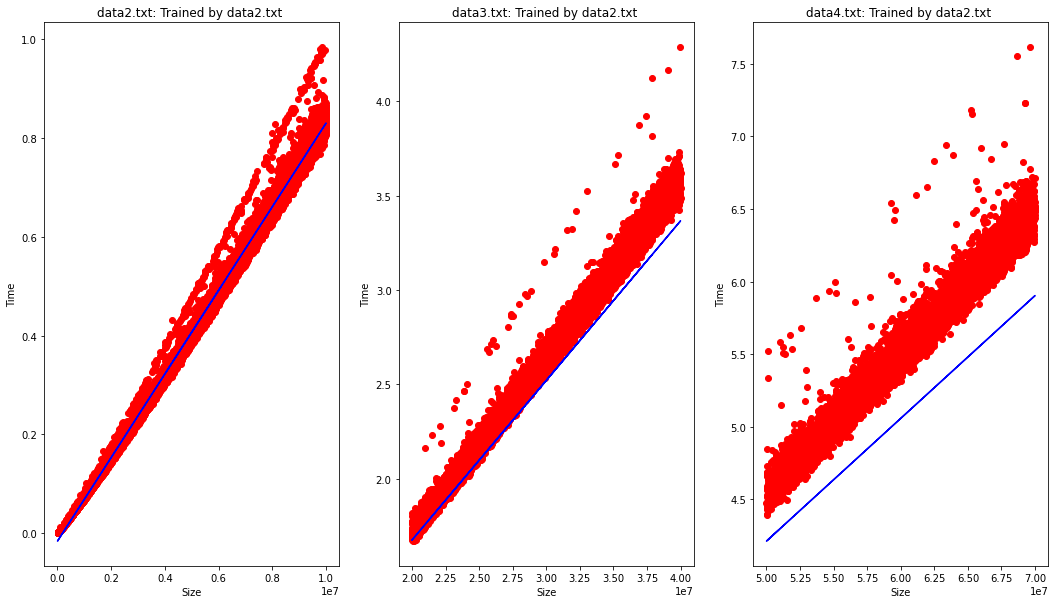

In [430]:
_, (axes1, axes2, axes3) = plt.subplots(nrows=1, ncols=3 , figsize=(18, 10))

axes1.scatter(x_train, y_train, color = 'red')
axes1.plot(x_train, y_pred, color = 'blue')
axes1.set(xlabel = 'Size', ylabel = 'Time', title = 'data2.txt: Trained by data2.txt ')


axes2.scatter(x_test3, y_test3, color = 'red')
axes2.plot(x_test3, y_pred3, color = 'blue')
axes2.set(xlabel = 'Size', ylabel = 'Time', title = 'data3.txt: Trained by data2.txt ')

axes3.scatter(x_test4, y_test4, color = 'red')
axes3.plot(x_test4, y_pred4, color = 'blue')
axes3.set(xlabel = 'Size', ylabel = 'Time', title = 'data4.txt: Trained by data2.txt ')

Mô hình hoá kết quả khi DÙNG increase dimension

[Text(0, 0.5, 'Time'),
 Text(0.5, 0, 'Size'),
 Text(0.5, 1.0, 'data4.txt: Trained by data2.txt ')]

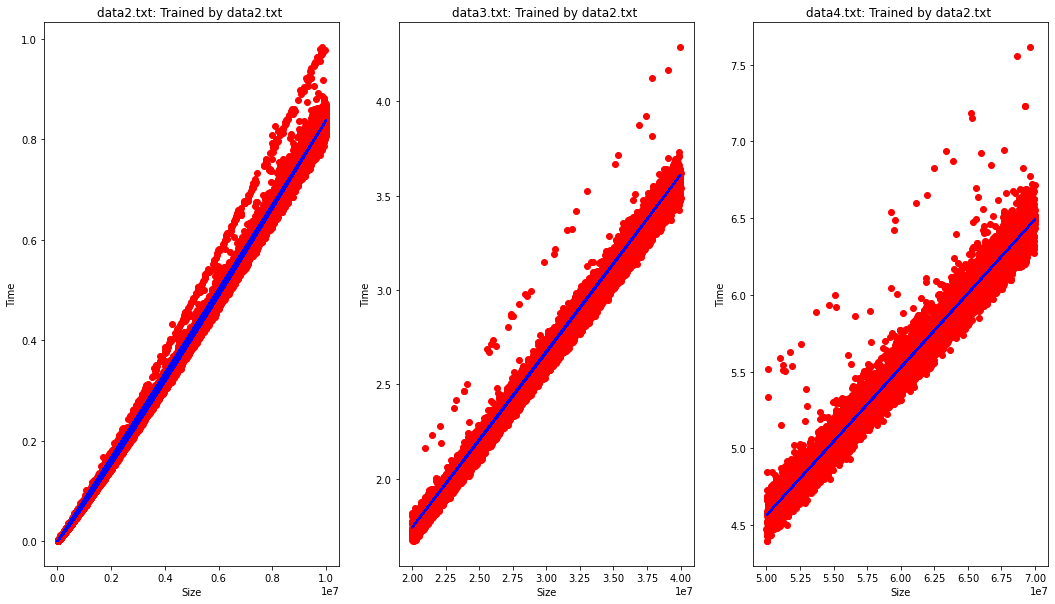

In [437]:
_, (axes1, axes2, axes3) = plt.subplots(nrows=1, ncols=3 , figsize=(18, 10))

axes1.scatter(x_train, y_train, color = 'red')
axes1.plot(x_train, y_pred_incre, color = 'blue')
axes1.set(xlabel = 'Size', ylabel = 'Time', title = 'data2.txt: Trained by data2.txt ')


axes2.scatter(x_test3, y_test3, color = 'red')
axes2.plot(x_test3, y_pred3_incre, color = 'blue')
axes2.set(xlabel = 'Size', ylabel = 'Time', title = 'data3.txt: Trained by data2.txt ')

axes3.scatter(x_test4, y_test4, color = 'red')
axes3.plot(x_test4, y_pred4_incre, color = 'blue')
axes3.set(xlabel = 'Size', ylabel = 'Time', title = 'data4.txt: Trained by data2.txt ')

In [443]:
#MSE
import sklearn
print("MSE cua bo test data2.txt =", sklearn.metrics.mean_squared_error(y_train, y_pred))

print("MSE cua bo test data2.txt sau khi increase dimension =", sklearn.metrics.mean_squared_error(y_train, y_pred_incre))

MSE cua bo test data2.txt = 0.00014337728721748835
MSE cua bo test data2.txt sau khi increase dimension = 0.00012190225045388428


In [444]:
print("MSE cua bo test data3.txt =", sklearn.metrics.mean_squared_error(y_test3, y_pred3))

print("MSE cua bo test data3.txt sau khi increase dimension =", sklearn.metrics.mean_squared_error(y_test3, y_pred3_incre))

MSE cua bo test data3.txt = 0.020664949397549082
MSE cua bo test data3.txt sau khi increase dimension = 0.004181175138868819


In [445]:
print("MSE cua bo test data4.txt =", sklearn.metrics.mean_squared_error(y_test4, y_pred4))

print("MSE cua bo test data4.txt sau khi increase dimension =", sklearn.metrics.mean_squared_error(y_test4, y_pred4_incre))

MSE cua bo test data4.txt = 0.22348476817426036
MSE cua bo test data4.txt sau khi increase dimension = 0.01461965795175033


Kết luận: Sau khi dùng phương pháp Increase Dimension, giá trị của MSE giảm xuống, kết quả dự đoán của chương trình cũng gần đúng với thực tế hơn